<a href="https://colab.research.google.com/github/devangi2000/TensorFlow01/blob/master/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import zipfile
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-06-13 08:22:31--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.70.189.222, 2600:1408:8c00:599::e59, 2600:1408:8c00:5a9::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.70.189.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   113MB/s    in 7.7s    

2020-06-13 08:22:39 (102 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [0]:
try:
  os.mkdir('/tmp/cats-v-dogs/')
  os.mkdir('/tmp/cats-v-dogs/training/')
  os.mkdir('/tmp/cats-v-dogs/testing/')
  os.mkdir('/tmp/cats-v-dogs/training/cats/')
  os.mkdir('/tmp/cats-v-dogs/training/dogs/')
  os.mkdir('/tmp/cats-v-dogs/testing/cats/')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs/')

except OSError:
  pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  all_images = os.listdir(SOURCE)
  random.sample(all_images, len(all_images))
  split_index = round(SPLIT_SIZE*(len(all_images)))
  train_images = all_images[:split_index]
  test_images = all_images[split_index:]

  for img in train_images:
    src = os.path.join(SOURCE, img)
    dst = os.path.join(TRAINING, img)
    if os.path.getsize(src)<=0 :
      print(img + ' has zero length!')
    else:
      copyfile(src, dst)


  for img in test_images:
    src = os.path.join(SOURCE, img)
    dst = os.path.join(TESTING, img)
    if os.path.getsize(src)<=0:
      print(img + ' has zero length!')
    else:
      copyfile(src,dst)


CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
TRAINING_CATS_DIR = '/tmp/cats-v-dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats-v-dogs/testing/cats/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = '/tmp/cats-v-dogs/training/dogs/'
TESTING_DOGS_DIR = '/tmp/cats-v-dogs/testing/dogs/'

split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg has zero length!
11702.jpg has zero length!


In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [0]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [8]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=10,
    class_mode='binary',
    target_size=(150,150)
)

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1/255.0)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=10,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [9]:
history = model.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1916/2250 [========================>.....] - ETA: 3:05 - loss: 0.5957 - acc: 0.6867

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 1290s 573ms/step - loss: 0.5834 - acc: 0.6975 - val_loss: 0.4610 - val_acc: 0.7864
Epoch 2/2
2250/2250 [==============================] - 1287s 572ms/step - loss: 0.4815 - acc: 0.7810 - val_loss: 0.4429 - val_acc: 0.8180


Text(0.5, 1.0, 'Training and validation loss')

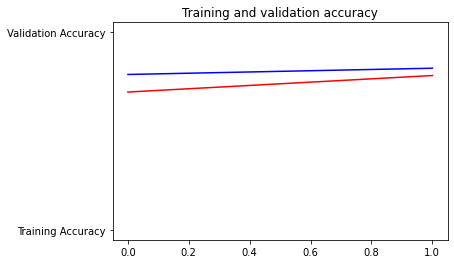

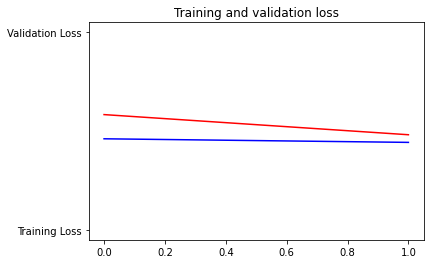

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')